# Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to make predictions about what behaviors are likely to occur in the future, or what the truth is about what has already occured. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering full population would, usually, outweigh the benefit of having perfectly accurate data, we are okay with using incomplete samples to make inferences. 

Suppose that your company has decided to implement a new marketing campaign and needs help from you, their data scientist, to analyze it. They randomly select 20 stores to be pilot stores for the new program. After one month they compare revenues of the randomly selected 20 stores, shown below.

**Your company wishes to know if the new marketing campaign resulted in a higher average monthly revenues than their company average of $120,000 per month** 

These data have been randomly generated. But in the spirit of this chapter, the population from which they were generated should remain unknown. 


|Pilot Store Revenues |
|---------------------|
|     \$121,646       |
|     \$104,134       |
|     \$185,416       |
|     \$186,476       |
|     \$81,705        |
|     \$149,316       |
|     \$139,109       |
|     \$116,402       |
|     \$127,047       |
|     \$122,271       |
|     \$89,780        |
|     \$166,073       |
|     \$126,825       |
|     \$89,819        |
|     \$94,316        |
|     \$151,898       |
|     \$118,038       |
|     \$39,741        |
|     \$143,032       |
|     \$104,177       |                          

In [1]:
import numpy as np
import pandas as pd

#Copy-and-paste these data to a dataframe to be analyzed:
revenues_df = pd.DataFrame([
    121648, 104134, 185416, 186478, 81705, 149316, 139109, 116402, 127047,
    122271, 89780, 166073, 126825, 89819, 94316, 151898, 118038, 39741, 143032,
    104177
],
                           columns=["Pilot Store Revenues"])
revenues_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pilot Store Revenues,121648,104134,185416,186478,81705,149316,139109,116402,127047,122271,89780,166073,126825,89819,94316,151898,118038,39741,143032,104177


You could do a quick calculation on these to see if the revenues were different, but in statistics it is acknowledged that some variation can happen randomly, not due to real differences. If the company had one-half of it's stores try the new marketing campaign, you would have near-perfect data to compare revenues between the pilot and non-pilot stores. But, the risk your comapny would take by implementing an unproven marketing campaign to half of it's stores is too high a price to pay for perfect data. Luckily, through statistical inference, we can make a very accurate prediction about how the new marketing campaign would work if it was spread to many more stores, and if it was more effective than the current marketing strategy for your company. 

To start, you formulate your __hypotheses__. These are mutually exclusive, falsifiable statements. Only one can be true, and one of them will be true. We create these two hypotheses: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### 4 Steps of Hypothesis Testing

All hypotheses are tested using a four-step process:

1. State the two hypotheses so that only one can be right. 
2. Formulate an analysis plan, which outlines how the data will be evaluated.
3. Carry out the plan and physically analyze the sample data.
4. Analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.

Hypothesis testing can be done mentally. It would be burdensome to have to state your _null_ and _alternate_ hypotheses, and run through these four steps explicitly every time you made a predictive computer model. The point is that in means testing, there is a clear process and result that deliniates "Yes, the true means of these samples are different" and "No, they're not significantly different"

In the case of us determining the efficacy of our company's marketing campaign, these are our hypotheses: 

- $H_o$: There is no difference between the two group's avergage revenue. 
- $H_a$: The pilot stores have a higher mean revenue than the control stores. 

We will evaluate these hypotheses using statistical techniques that offer us an informed decision. 

<span style="color:red">
    <font size = "20">
 Not sure if this is our best example but I changed the random data to be drawn from a normally distributed population. Could work.
        

## Measures of Central Tendency and Dispersion
##### Mean, Median, Mode , and Degrees of Freedom
For a given dataset, useful descriptive statistics of central tendency include mean, median, and mode, which we built as functions in chapter 3. 
- The **Mean** gives the expected value for a given data point by summing all of the observations and dividing by the number of them. 
    - The population mean is denoted as $\mu$. This is if we have all of the data from our population of interest. 
    - If $\mu$ is unknown(which is more common), and we have only a _sample_ of data drawn randomly from a population, we use $\bar{X}$ as an _estimator_ of $\mu$. One must keep in mind that each sample mean $\bar{x_i}$ drawn from the same population is likely to vary; consequently, some degree of uncertainty is involved with $\bar{X}$
        - Note that $\bar{X}$ refers to the *random variable* representing the mean of a sample, which could take on any *individual* values $\bar{x_i}$, due to sampling uncertainty. $x_i$ (without the bar) is an individual datapoint. In both cases, $i$ represents an integer denoting the current iteration of the value at $i = 1,2,3,...$.
    <h3 align="center">
    <font size="4">
         $\bar{X} = \frac{1}{n}\sum_{i=1}^nx_i$
    </font>
    </h3> 
    
    
- The degree to which $\bar{X}$, and any statistical population parameter estimator produced from a sample, is allowed to vary, is the **Degrees of Freedom** of the sample. This is the number of independent pieces of information that go into the estimate of a parameter(sample size $n$), minus the number of parameters used as intermediate steps in the estimation of the parameter itself. So if we estimate $\bar{x}$ once: 
    <h3 align="center">
    <font size="4">
        $ df = n - 1$
    </font>
    </h3> 
    
    
- The **Median** is less sensitive to outliers than mean; it is the value in the middle of the dataset
- The **Mode** is the value which occurs the most in the dataset, in a distribution it is the top of the curve 
     - _Consider this : in 2020, the real **Median** personal income in the United States was \$35,805, and the real **Mean** personal income was \$53,996. Why might these measures be so different?_

In [2]:
from datlib.stats import *

# using our previously built functions to find means
pilot_stores_mean = mean(revenues_df["Pilot Store Revenues"])

# medians
pilot_stores_median = median(revenues_df["Pilot Store Revenues"])

print("Pilot mean: ", pilot_stores_mean, "\n Pilot median: ",
      pilot_stores_median)
# mode not applicable because each value in our data appears once

Pilot mean:  122861.25 
 Pilot median:  121959.5


###### Variance, Standard Deviation, and Standard Error
After knowing where the center of a dataset lies, the next important measure is one that tells us how spread out the data is. We will cover Variance, Standard Deviation, and Standard Error. 

- **Variance** quantifies the amount of variability around the mean of a dataset by adding together the square of the distance of each individual observation of $x$ from its sample mean $\bar{x}$. It is denoted $\sigma^2$ if population-level data (mean $\mu$) is known and $s^2$ if it is a sample from an unfamiliar population: 
<h3 align="center">
    <font size="4">
        $ s^2 = \frac{1}{(n-1)}\sum_{i=1}^n (x_i - \bar{x})^2$
    </font>
    </h3> 
    
    
- **Standard Deviation** is the positive square root of the variance for a set of data. It is used much more often in data analysis than variance, primarily because it has the same units of measurement as the mean. It corrects the squaring of individual observations deviations from the mean done when calculating variance. It is denoted $s$ when working with a sample with an unknown population mean $\mu$. $s$ is an _estimator_ of $\sigma$, which is standard deviation when $\mu$ is known: 
<h3 align="center">
    <font size="4">
        $ s = \sqrt{s^2}$
    </font>
    </h3> 


- **Standard Error** describes how likely a given random sample mean $\bar{x_i}$ is to deviate from the population mean $\mu$. It is the standard deviation of the probability distribution for the random variable $\bar{X}$, which represents all possible samples of a single given sample size $n$. As $n$ increases, $\bar{X}$ can be expected to deviate less from $\mu$, so standard error decreases. Because population standard deviation $\sigma$ is rarely given, we again use an _estimator_ for standard error, denoted $s_\bar{x}$. Populational data has no standard error as $\mu$ can only take on a single value. 
<h3 align="center">
    <font size="4">
        $ s_\bar{x} = \frac{s}{\sqrt{n}}$
    </font>
    </h3> 



In [3]:
from datlib.stats import *
import numpy as np


def var(lst):
    df = len(lst) - 1
    x_bar = mean(lst)
    squared_deviations = 0
    for i in range(len(lst)):
        squared_deviations += (lst[i] - x_bar)**2
    return (1 / df) * (squared_deviations)


def SD(lst):
    df = len(lst) - 1
    x_bar = mean(lst)
    squared_deviations = 0
    for i in range(len(lst)):
        squared_deviations += (lst[i] - x_bar)**2
    return np.sqrt(
        (1 / df) * (squared_deviations))  # take square root of variance


def SE(lst):
    n = len(lst)
    standard_error = SD(lst) / (n**(1 / 2))
    return standard_error


pilot_variance = var(revenues_df["Pilot Store Revenues"])

pilot_SD = SD(revenues_df["Pilot Store Revenues"])

pilot_SE = SE(revenues_df["Pilot Store Revenues"])

print("Pilot Stores Data: \nVariance: " + str(int(pilot_variance)) + "\nSD: " +
      str(int(pilot_SD)) + "\nSE: " + str(int(pilot_SE)))

Pilot Stores Data: 
Variance: 1286575296
SD: 35868
SE: 8020


In [4]:
# cross check with pandas function
print(revenues_df.sem(), "\n", revenues_df.std(), '\n',
      revenues_df.var())

Pilot Store Revenues    8020.521482
dtype: float64 
 Pilot Store Revenues    35868.862496
dtype: float64 
 Pilot Store Revenues    1.286575e+09
dtype: float64


## Distributions
### Normal Distribution 
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and economic phenomena. You will encounter it for most predictive models you create. It is one of the assumptions of many computational algorithms.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. Roughly 68% of the observations in a normal distribution will occur within one standard deviations of the distribution's mean. 

#### Standard Normal Distribution

A **Standard Normal Distribution** is defined as a normal distribution with $\mu = 0$ and $\sigma = 1$. 

__Probability__ takes on a value from 0 to 1, with a probability of 0 for an event meaning that it would never occur in infinite samples, a probability of 0.5 means that in a sufficiently large number of trials, half of the trials would result in success, and a probability of 1 meaning that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{x_i}$, and the probability of that value occuring. This sampling distribution takes on a standard deviation of $\frac{s}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{x}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

We should view the sampling distributions of $\bar{X}$ and $S^2$ as the mechanisms from
which we will be able to make inferences on the parameters $\mu$ and $\sigma^2$. The sampling distribution of $\bar{X}$ with sample size $n$ is the distribution that results when an experiment is conducted over and over (always with sample size $n$) and the many values of $\bar{X}$ result. This sampling distribution, then, describes the variability of sample averages around the population mean $\mu$ . In the case of our store revenues, knowledge of the sampling distribution of $\bar{X}$ arms us
with the knowledge of a “typical” discrepancy between an observed $\bar{x}$ value and
true $\mu$. The same principle applies in the case of the distribution of $s^2$. The sampling distribution produces information about the variability of $s^2$ values around
$\sigma^2$ in repeated experiments. 

As an example of a normal distribution, we plot a histogram of month-to-month unemployment changes in the US since 1970. 

In [24]:
import pandas_datareader as web
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [6]:
start = dt.datetime(1970, 1, 1)
end = dt.datetime.today()

gdp = web.DataReader('GDP', 'fred', start, end)

In [7]:
unemployment_rate = web.DataReader('UNRATE', 'fred', start, end)

<ipython-input-102-3f994d4e4edf>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(round(x,1)) + "%" for x in xvals])
<ipython-input-102-3f994d4e4edf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y,1)) + "%" for y in yvals])


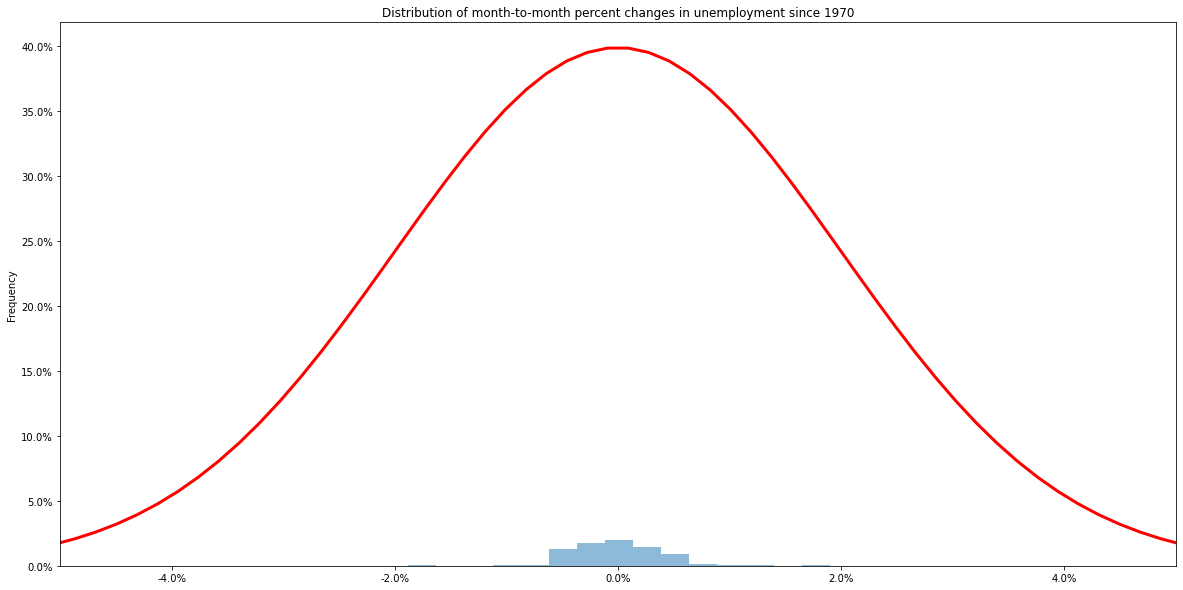

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
unrate = unemployment_rate[["UNRATE"]].diff()[1:]
# unrate["UNRATE"].plot.density(ax = ax)
unrate["UNRATE"].plot.hist(bins=100, ax=ax, alpha=.5, 
            label="Unemployment Rate",
              legend = False,
              density = True)
x = unrate.mean()
std = unrate.std()


x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000) * 100, lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')

xvals = ax.get_xticks()
ax.set_xticklabels([str(round(x,1)) + "%" for x in xvals])
yvals = ax.get_yticks()
ax.set_yticklabels([str(round(y,1)) + "%" for y in yvals])


# plt.axvline(x, label="mean = " + str(x * 100) + '%', linestyle='--', c='r')




ax.set_xbound(lower=-2.5, upper=2.5)
plt.title("Distribution of month-to-month percent changes in unemployment since 1970")
plt.show()

In [77]:
unrate.std()

UNRATE    0.476495
dtype: float64

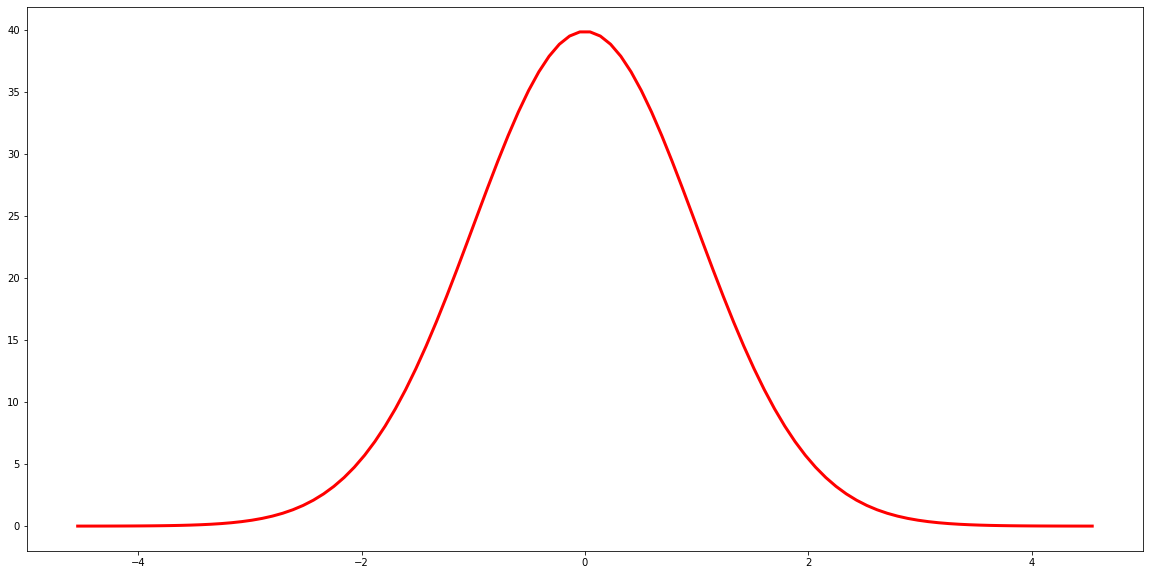

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000) * 100, lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')

In [65]:
x

array([-4.54070286, -4.44897149, -4.35724012, -4.26550875, -4.17377738,
       -4.082046  , -3.99031463, -3.89858326, -3.80685189, -3.71512052,
       -3.62338915, -3.53165778, -3.43992641, -3.34819504, -3.25646367,
       -3.1647323 , -3.07300092, -2.98126955, -2.88953818, -2.79780681,
       -2.70607544, -2.61434407, -2.5226127 , -2.43088133, -2.33914996,
       -2.24741859, -2.15568722, -2.06395584, -1.97222447, -1.8804931 ,
       -1.78876173, -1.69703036, -1.60529899, -1.51356762, -1.42183625,
       -1.33010488, -1.23837351, -1.14664214, -1.05491077, -0.96317939,
       -0.87144802, -0.77971665, -0.68798528, -0.59625391, -0.50452254,
       -0.41279117, -0.3210598 , -0.22932843, -0.13759706, -0.04586569,
        0.04586569,  0.13759706,  0.22932843,  0.3210598 ,  0.41279117,
        0.50452254,  0.59625391,  0.68798528,  0.77971665,  0.87144802,
        0.96317939,  1.05491077,  1.14664214,  1.23837351,  1.33010488,
        1.42183625,  1.51356762,  1.60529899,  1.69703036,  1.78

<span style="color:red">
    <font size = "5">
This is a nice demonstration of a normal distribution
        </span>

As we can see, a given change in unemployment from month to month since 1970 is normally distributed with a very slightly positive mean of 0.27%. Had we pulled the data in 2019, the mean would've been negative, but the still slightly higher-than-usual unemployment rate resulting from 2020-2021 causes our overall mean to be positive. 

In addition, we can show that our revenue data sampling distribution roughly follows a normal distribution: 

<AxesSubplot:ylabel='Frequency'>

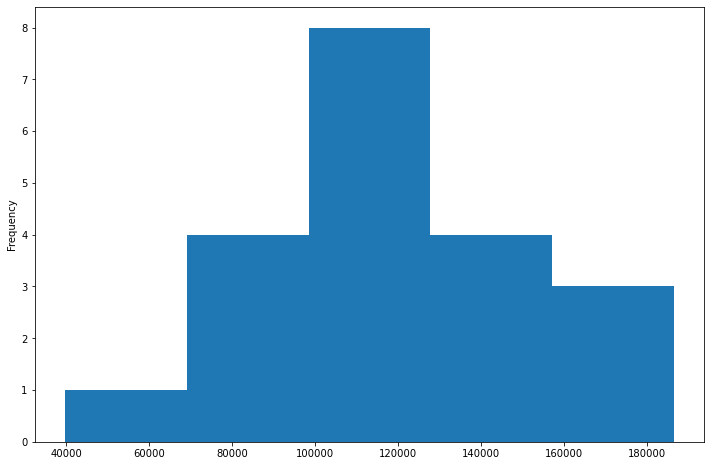

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
revenues_df['Pilot Store Revenues'].plot.hist(bins=5)

# Comparisons of Means

When dealing with a population of known parameters $\mu$ and $\sigma^2$, we can take any mean $\bar{X}$ gotten from a sample and determine the likelihood that the sample came from out known population, or a population with same mean as our known population. We do this using a z-score: 
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\sigma}$
    </font>
</h3>

### Central Limit Theorem:


If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n$ ≥ 30, provided the population distribution is not terribly skewed. If $n$ < 30, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.


So, for any sample with $n$ > 30, $\bar{x}$ can be substituted for $\mu$ and $s$ can be substituted for $\sigma$
 
This Z-test asunes that we have access to the population standard deviation and mean _or_ that $n$ is large enough (>30) for $s^2$ and $\bar{x}$ to be used as a reliable estimate for $\sigma^2$ and $\mu$. When these conditions do not hold, and we do not have a large enough sample or sufficient population data, we need another estimator.  
 

The __T-test__ is used when we are dealing with a population of unknown distribution, and would like to compare a given sample mean to one of three options: 

- **One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to the population mean, like our value of 120,000 for average mothly store revenue
<h3 align="center">
    <font size="7">
        $ t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 

- **Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) is the most common form of the T test. It helps you to compare the means of two sets of data. This would be useful if we wanted to compare revenues with a sample from a different store franchise than our own. 
<h3 align="center">
    <font size="7">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{(s^2)_p[(1/n_1)+(1/n_2)]}}$
    </font>
    </h3> 
- **Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful if we chose a random sample of stores and measured their mean revenues before and after implementation of the new marketing campaign as our two means. For ths test, new terms are used, $\bar{d}$,  $\delta$, and $s_d$. $\bar{d}$ represents the average difference between $x_i1$ and $x_i2$, $s_d$ is the standard error of $\bar{d}$, and  $\delta$ is the hypothesized difference value being tested between the two means. It is usually 0.  
<h3 align="center">
    <font size="10">
        $ t = \frac{\bar{d} - \delta}{\frac{s_d}{\sqrt{n}}}$
    </font>
    </h3> 
    
Where...
<h3 align="center">
    <font size="3">
        $ \bar{d} = \sum_{i=1}^{n} d_i$
    </font>
    </h3> 
And...
<h3 align="center">
    <font size="3">
        $ s_d = \sqrt{\frac{\sum_{i=1}^{n} (d_i-\bar{d})^2}{n-1}}$
    </font>
    </h3> 

<span style="color:red">
    <font size = "5">
Progress as of 11/15
        </span>
    
### T Distributions
All of the t-distributions below are normal distributions. As the degrees of freedom increases past 30 or so, the distribution becomes the _standard normal distribution_, which has a standard deviation of 1 and mean of 0, and we use z-scores to analyze this. 

__The $t$ value tells us how many standard deviations away from the mean our sample sits on a $t$ distribution of the _differences_ of these two means, where the mean of the distribution is zero.__
The t-distribution changes based on sample size, as increased sample size allows for higher _degrees of freedom_, which are defined for two samples as: 

- $df = (N_1 + N_2)  – 2$

And for a single sample as: 

- $df = N - 1$


In [ ]:

import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
t_df = [1, 2, 3, 4, 5, 10, 20]
for df in t_df:
    x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 1000)
    ax.plot(x, t.pdf(x, df), '-', lw=1, alpha=df/20,  label = "df: "+ str(df), color='k')
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1000), lw=3, alpha=1, color = 'r',  label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel("Standard Deviations away from mean( this varies as the distributions have different SD's)")
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels = "")
plt.legend()

### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approacch 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. That is why we use z-score for large sample sizes. 

Once we get our t-score based on the t-distribution, shown on the x-axis of the above graph, we get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which a non-significant result becomes a significant one is called the __*critical value*__, denoted $\alpha$, and is most commonly 0.05. For a two-tailed t-test, where we want to know if one sample is either significantly higher or lower than the other, we will choose to reject $H_o$ if our t-value falls within the outer 2.5% of our distribution(.025*2 = .05), which would result in a p-value of less thanm .05 for a two-tailed t-test. 

Let's return to our example of company starting salary to see if we can make an educated inference about whether or not one company actually has a higher starting salary than the other. 

In [ ]:
import pandas as pd

# create dataframe to store randomly collected salary data
salary_data = pd.DataFrame()
a = salary_data["Company A"] = [
    100, 146, 138, 126, 125, 129, 110, 123, 155, 106
]
b = salary_data["Company B"] = [
    118, 145, 139, 118, 106, 121, 109, 106, 131, 139
]
salary_data

In [ ]:
stats.ttest_ind(a, b, alternative="two-sided")

Our test gave us results of $t = 0.363$ and $p = 0.721$. 


This tells us: 
- This result was only 0.363 standard deviations from the mean of the t-distribution, which is very close. 
- There is a 0.721 probability that this result would occur if the true difference between the sample means was zero. This is very high and means that we fail to reject our null hypothesis that the mean salary of the two companies is probably the same or close to it. 


# ANOVA 